### Compute a histogram of energy in each case, and plot all the histograms on the same plot. Do they overlap well?

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
energy_300 = np.loadtxt('T300_potential_energy.xvg', comments=['#', '@'])
energy_363 = np.loadtxt('T363_potential_energy.xvg', comments=['#', '@'])
energy_440 = np.loadtxt('T440_potential_energy.xvg', comments=['#', '@'])

print(energy_300[0])
print(energy_300)

[ 0.       18.918888]
[[   0.         18.918888]
 [  10.         41.288376]
 [  20.        -16.197433]
 ...
 [4980.         10.284142]
 [4990.          5.227531]
 [5000.         24.832222]]


In [17]:
print(bins)

[-30.         -26.32653061 -22.65306122 -18.97959184 -15.30612245
 -11.63265306  -7.95918367  -4.28571429  -0.6122449    3.06122449
   6.73469388  10.40816327  14.08163265  17.75510204  21.42857143
  25.10204082  28.7755102   32.44897959  36.12244898  39.79591837
  43.46938776  47.14285714  50.81632653  54.48979592  58.16326531
  61.83673469  65.51020408  69.18367347  72.85714286  76.53061224
  80.20408163  83.87755102  87.55102041  91.2244898   94.89795918
  98.57142857 102.24489796 105.91836735 109.59183673 113.26530612
 116.93877551 120.6122449  124.28571429 127.95918367 131.63265306
 135.30612245 138.97959184 142.65306122 146.32653061 150.        ]


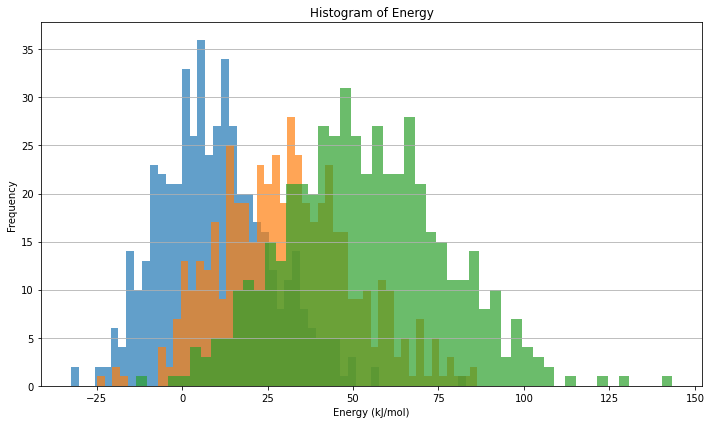

In [26]:
# # Load data using numpy's loadtxt with the specified comments
# data_np = np.loadtxt('T300_potential_energy.xvg', comments=['@', '#'])

# Compute histogram
hist_np1, bins_np1 = np.histogram(energy_300[:, 1], bins=50)
hist_np2, bins_np2 = np.histogram(energy_363[:, 1], bins=50)
hist_np3, bins_np3 = np.histogram(energy_440[:, 1], bins=50)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(bins_np1[:-1], hist_np1, width=(bins_np1[1]-bins_np1[0]), align='edge', alpha=0.7)
plt.bar(bins_np2[:-1], hist_np2, width=(bins_np2[1]-bins_np2[0]), align='edge', alpha=0.7)
plt.bar(bins_np3[:-1], hist_np3, width=(bins_np3[1]-bins_np3[0]), align='edge', alpha=0.7)

plt.xlabel('Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../Figures/energy_histograms.png')
plt.show()

### Make a free energy surface for T=300 using the data in T=300. Do you now see the whole surface? Set the maximum free energy to 10 kT

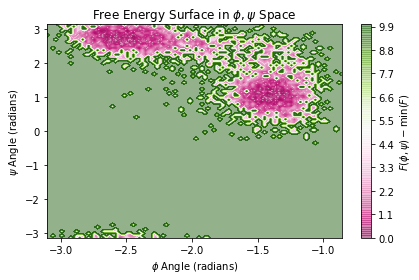

In [34]:
import mdtraj as md

traj = md.load('../Data/T300/adp_exchange3temps.trr', top='../Data/T300/adp_exchange3temps.gro')

phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)


hist, xedges, yedges = np.histogram2d(phi_angles.reshape(-1), psi_angles.reshape(-1), bins=100, normed=True)
hist[hist == 0] = 1e-5  # Avoid log(0)


F = -np.log(hist)
F -= np.min(F)
F[F > 10] = 10


extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.contourf(F.T, 100, cmap="PiYG", extent=extent, alpha=0.5)
plt.colorbar(label=r"$F(\phi, \psi) - \min(F)$")
plt.xlabel(r'$\phi$ Angle (radians)')
plt.ylabel(r'$\psi$ Angle (radians)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
plt.tight_layout()
plt.savefig('../Figures/free_energy_surface_T300.png')
plt.show()

### use the script demux.pl (available after loading gromacs module) on the log file in T300/ to generate files "replica_index.xvg replica_temp.xvg". Plot how each replica is moving in temperature in replica_temp (you may have to do every 100 frame to see what's happening) and make sure it goes up and down

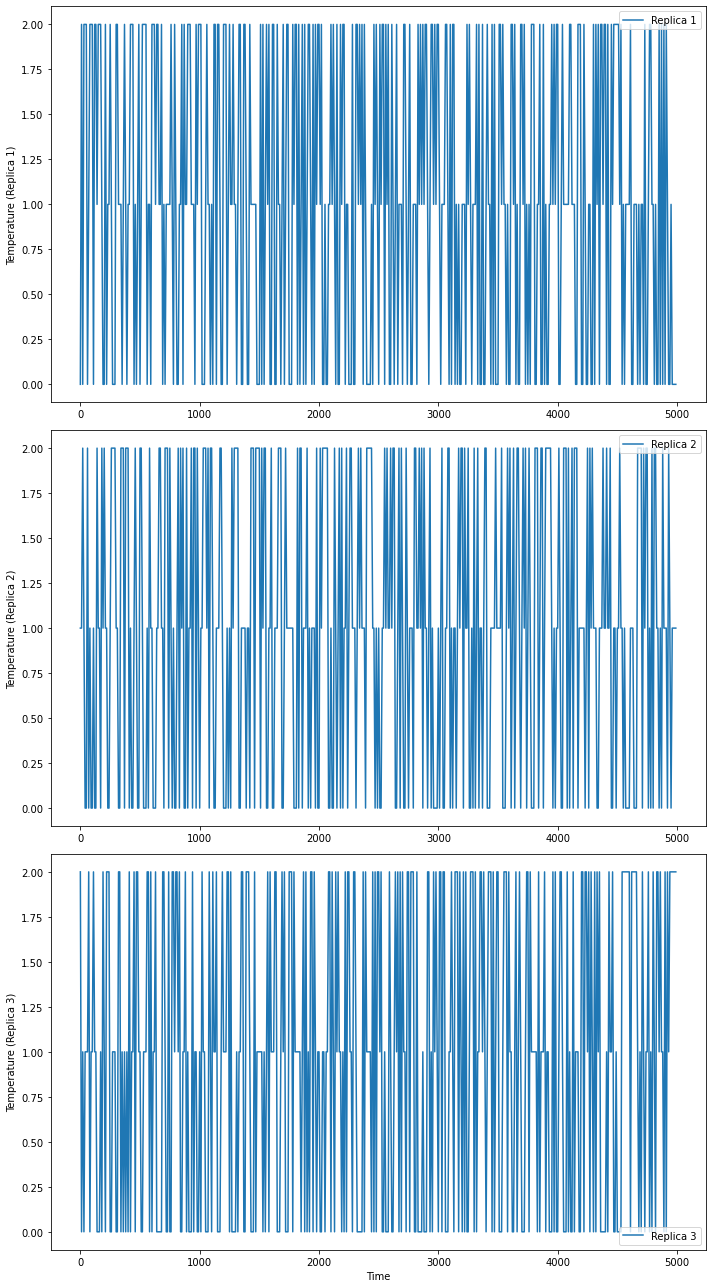

In [36]:
replica = np.loadtxt('T300_replica_temp.xvg')

time = replica[:, 0]
replica_temps = replica[:, 1:]

# Only plot every 1000th/100th point
time = time[::100]
replica_temps = replica_temps[::100, :]

# # Plot
# plt.figure(figsize=(10, 6))
# for i, replica in enumerate(replica_temps.T, start=1):
#     plt.plot(time, replica, label=f'Replica {i}')



num_replicas = replica_temps.shape[1]
fig, axes = plt.subplots(num_replicas, 1, figsize=(10, 6*num_replicas))

for i, (replica, ax) in enumerate(zip(replica_temps.T, axes), start=1):
    ax.plot(time, replica)
    ax.set_ylabel(f'Temperature (Replica {i})')
    ax.legend([f'Replica {i}'])

axes[-1].set_xlabel('Time')  # Set x-label for the last subplot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.savefig('../Figures/replica_temperatures_every100.png')
plt.show()
